# Import thư viện cần thiết

In [1]:
#Important packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering

# LOAD dữ liệu

In [2]:
#Load Dataset
pd.set_option('display.max_columns', None)
data = pd.read_csv("03_Clustering_Marketing.csv")

In [180]:
#Running head command to see first 6 observations
data.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,1,2,0,1,0,0,4,0,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,0,0,3,0,6,0,2,0,0,0,0,0,1,0,1,1,0,0,5,0,0,0,0,3,0,0,0,0,0,0


# Thống kê dữ liệu

In [181]:
data.describe()

,gradyear,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,2007.496933,29.834533,0.267000,0.255467,0.22200,0.159667,0.142933,0.135000,0.105133,0.104133,0.08820,0.143667,0.328067,0.214600,0.13820,0.126600,0.104733,0.430867,0.301933,0.042133,0.732933,0.245867,0.474933,0.244667,0.112133,0.020800,0.431200,0.116467,0.112867,0.259467,0.357267,0.150267,0.071800,0.051467,0.185867,0.118067,0.091733,0.061067
std,1.116516,35.386649,0.788851,0.702260,0.92042,0.737344,0.638747,0.548691,0.502491,0.519205,0.53032,0.476209,0.810976,1.277806,0.51191,0.470801,0.539305,1.167495,1.075692,0.297261,1.194475,0.742150,1.335873,0.790810,0.585362,0.212533,1.089287,0.461862,2.708619,0.704398,0.728512,0.478716,0.356258,0.280755,0.609928,0.455200,0.420631,0.349112
min,2006.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,20.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,44.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,605.000000,22.000000,9.000000,22.00000,17.000000,14.000000,31.000000,8.000000,14.000000,15.00000,12.000000,14.000000,114.000000,12.00000,10.000000,26.000000,29.000000,27.000000,9.000000,23.000000,18.000000,52.000000,17.000000,30.000000,11.000000,21.000000,7.000000,327.000000,12.000000,11.000000,8.000000,8.000000,8.000000,16.000000,14.000000,8.000000,16.000000


# Thống kê những giá trị null

In [182]:
data.isnull().sum()

gradyear              0
gender             1337
age                2496
NumberOffriends       0
basketball            0
football              0
soccer                0
softball              0
volleyball            0
swimming              0
cheerleading          0
baseball              0
tennis                0
sports                0
cute                  0
sex                   0
sexy                  0
hot                   0
kissed                0
dance                 0
band                  0
marching              0
music                 0
rock                  0
god                   0
church                0
jesus                 0
bible                 0
hair                  0
dress                 0
blonde                0
mall                  0
shopping              0
clothes               0
hollister             0
abercrombie           0
die                   0
death                 0
drunk                 0
drugs                 0
dtype: int64

**A total of 2496 records have missing ages. Also concerning is the fact that the minimum and maximum values seem to be unreasonable; it is unlikely that a 3 year old or a 106 year old is attending high school.**

# 📌Let's have a look at the number of male, female and missing values

In [183]:
data['gender'].value_counts(dropna = False) #display NaN values also

gender
F      11057
M       2606
NaN     1337
Name: count, dtype: int64

**There are 11057 female, 2606 male teen students and 1337 missing values**

# 📌Now fill all the null values in gender column with “Not disclosed”

In [3]:
data['gender'].fillna('not disclosed', inplace = True)


In [185]:
data['gender'].isnull().sum()

0

In [4]:
data['gender'].unique()

array(['not disclosed', 'F', 'M'], dtype=object)

# 📌One way to deal with these missing values would be to fill the missing values with the average age of each graduation year

In [5]:
data['age'] = pd.to_numeric(data['age'], errors='coerce')

In [6]:
data.groupby('gradyear')['age'].mean()

gradyear
2006    19.010786
2007    18.400134
2008    17.593006
2009    16.886244
Name: age, dtype: float64

# 📌Now fill the missing values for each graduation year with the mean that we got as above

In [7]:
data['age'] = data.groupby('gradyear')['age'].transform(lambda x: x.fillna(x.mean()))

In [201]:
data['age'].isnull().sum()

0

**From the above summary we can see that there are no missing values in the dataset**

# 📌Treating Outliers

**The original age range contains value from 3 - 106, which is unrealistic because student at age of 3 or 106 would not attend high school. A reasonable age range for people attending high school will be the age range between 13 to 21. The rest should be treated as outliers keeping the age of student going to high school in mind.

**Let's detect the outliers using a box plot below**

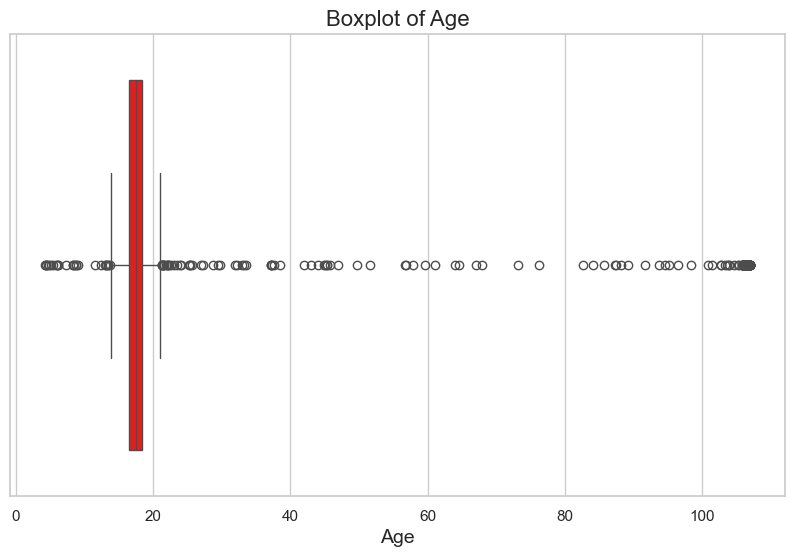

In [202]:
sns.set(style="whitegrid") 

plt.figure(figsize=(10, 6))  

sns.boxplot(x=data['age'], color='red')

plt.xlabel('Age', fontsize=14)
plt.title('Boxplot of Age', fontsize=16)

# Show the plot
plt.show()


In [8]:
q1 = data['age'].quantile(0.25)
print(q1)
q3 = data['age'].quantile(0.75)
print(q3)
iqr = q3-q1
print(iqr)

16.545
18.400134201954398
1.855134201954396


In [9]:
df = data[(data['age'] > (q1 - 1.5*iqr)) & (data['age'] < (q3 + 1.5*iqr))]

In [193]:
df['age'].describe()

**From the above summary we can observe that after treating the outliers the mininmum age is 13.843000 and the maximum age is 21.065000**

In [115]:
df.shape

(14824, 40)

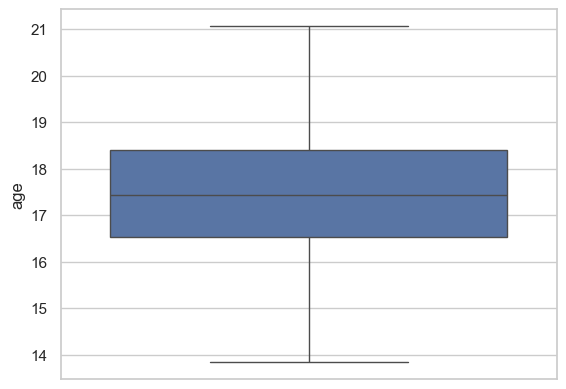

In [19]:
sns.boxplot(df["age"])
plt.show()

In [166]:
data['age'].describe()

count    14824.000000
mean        17.392977
std          1.134571
min         13.843000
25%         16.539000
50%         17.446000
75%         18.400134
max         21.065000
Name: age, dtype: float64

In [195]:
data.isnull().sum()

gradyear             0
gender               0
age                176
NumberOffriends      0
basketball           0
football             0
soccer               0
softball             0
volleyball           0
swimming             0
cheerleading         0
baseball             0
tennis               0
sports               0
cute                 0
sex                  0
sexy                 0
hot                  0
kissed               0
dance                0
band                 0
marching             0
music                0
rock                 0
god                  0
church               0
jesus                0
bible                0
hair                 0
dress                0
blonde               0
mall                 0
shopping             0
clothes              0
hollister            0
abercrombie          0
die                  0
death                0
drunk                0
drugs                0
dtype: int64

**From the above boxplot we observe that there are no outliers in the age column**

# 📌Data Preprocessing

In [10]:
names = df.columns[4:40]
scaled_feature = df.copy()
names

Index(['basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music',
       'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die',
       'death', 'drunk', 'drugs'],
      dtype='object')

In [11]:
scaled_feature.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,not disclosed,18.400134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.410000,49,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511000,41,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,1,2,0,1,0,0,4,0,0,1,0,0,0,0,0,0,1,1
3,2006,F,19.010786,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657000,1,0,0,0,0,0,1,0,0,3,0,6,0,2,0,0,0,0,0,1,0,1,1,0,0,5,0,0,0,0,3,0,0,0,0,0,0


In [12]:
features = scaled_feature[names]

In [211]:
features.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,1,2,0,1,0,0,4,0,0,1,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,3,0,6,0,2,0,0,0,0,0,1,0,1,1,0,0,5,0,0,0,0,3,0,0,0,0,0,0


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [28]:
scaled_feature[names] = features
scaled_feature.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,not disclosed,18.400134,0,-0.339355,-0.365296,-0.241099,-0.217422,-0.224563,-0.246262,-0.209631,-0.201088,-0.166382,-0.303293,-0.405275,-0.167460,-0.270446,-0.268779,-0.194639,-0.369052,-0.280677,-0.142393,-0.613998,-0.331043,-0.355403,-0.312748,-0.191116,-0.097716,-0.396063,-0.253075,-0.041578,-0.369056,-0.491207,-0.313859,-0.201391,-0.183584,-0.304644,-0.259508,-0.218099,-0.174865
1,2007,F,17.410000,49,-0.339355,-0.365296,0.843262,-0.217422,-0.224563,1.568148,-0.209631,-0.201088,-0.166382,-0.303293,-0.405275,-0.167460,-0.270446,-0.268779,-0.194639,-0.369052,-0.280677,-0.142393,-0.613998,-0.331043,0.390420,-0.312748,-0.191116,-0.097716,-0.396063,-0.253075,-0.041578,-0.369056,-0.491207,-0.313859,-0.201391,-0.183584,-0.304644,-0.259508,2.152208,-0.174865
2,2007,F,17.511000,41,-0.339355,-0.365296,-0.241099,-0.217422,-0.224563,-0.246262,-0.209631,1.715907,-0.166382,-0.303293,-0.405275,2.168572,-0.270446,-0.268779,-0.194639,-0.369052,-0.280677,-0.142393,0.222344,2.373496,-0.355403,0.970800,-0.191116,-0.097716,3.274038,-0.253075,-0.041578,1.045706,-0.491207,-0.313859,-0.201391,-0.183584,-0.304644,-0.259508,2.152208,2.692614
3,2006,F,19.010786,36,-0.339355,-0.365296,-0.241099,-0.217422,-0.224563,-0.246262,-0.209631,-0.201088,-0.166382,-0.303293,-0.405275,-0.167460,-0.270446,-0.268779,-0.194639,-0.369052,-0.280677,-0.142393,-0.613998,-0.331043,-0.355403,-0.312748,-0.191116,-0.097716,-0.396063,-0.253075,-0.041578,-0.369056,-0.491207,-0.313859,-0.201391,-0.183584,-0.304644,-0.259508,-0.218099,-0.174865
4,2008,F,16.657000,1,-0.339355,-0.365296,-0.241099,-0.217422,-0.224563,1.568148,-0.209631,-0.201088,5.486296,-0.303293,6.966254,-0.167460,3.625657,-0.268779,-0.194639,-0.369052,-0.280677,-0.142393,0.222344,-0.331043,0.390420,0.970800,-0.191116,-0.097716,4.191564,-0.253075,-0.041578,-0.369056,-0.491207,5.936888,-0.201391,-0.183584,-0.304644,-0.259508,-0.218099,-0.174865


# 📌Convert object variable to numeric

In [29]:
def gender_to_numeric(x):
    if x=="M":
        return 1
    if x=="F":
        return 2
    if x== 'not disclosed':
        return 3

In [30]:
scaled_feature['gender'] = scaled_feature['gender'].apply(gender_to_numeric)
scaled_feature['gender'].head()

0    3
1    2
2    2
3    2
4    2
Name: gender, dtype: int64

# 📌Checkig the transformed values

In [31]:
scaled_feature.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,3,18.400134,0,-0.339355,-0.365296,-0.241099,-0.217422,-0.224563,-0.246262,-0.209631,-0.201088,-0.166382,-0.303293,-0.405275,-0.167460,-0.270446,-0.268779,-0.194639,-0.369052,-0.280677,-0.142393,-0.613998,-0.331043,-0.355403,-0.312748,-0.191116,-0.097716,-0.396063,-0.253075,-0.041578,-0.369056,-0.491207,-0.313859,-0.201391,-0.183584,-0.304644,-0.259508,-0.218099,-0.174865
1,2007,2,17.410000,49,-0.339355,-0.365296,0.843262,-0.217422,-0.224563,1.568148,-0.209631,-0.201088,-0.166382,-0.303293,-0.405275,-0.167460,-0.270446,-0.268779,-0.194639,-0.369052,-0.280677,-0.142393,-0.613998,-0.331043,0.390420,-0.312748,-0.191116,-0.097716,-0.396063,-0.253075,-0.041578,-0.369056,-0.491207,-0.313859,-0.201391,-0.183584,-0.304644,-0.259508,2.152208,-0.174865
2,2007,2,17.511000,41,-0.339355,-0.365296,-0.241099,-0.217422,-0.224563,-0.246262,-0.209631,1.715907,-0.166382,-0.303293,-0.405275,2.168572,-0.270446,-0.268779,-0.194639,-0.369052,-0.280677,-0.142393,0.222344,2.373496,-0.355403,0.970800,-0.191116,-0.097716,3.274038,-0.253075,-0.041578,1.045706,-0.491207,-0.313859,-0.201391,-0.183584,-0.304644,-0.259508,2.152208,2.692614
3,2006,2,19.010786,36,-0.339355,-0.365296,-0.241099,-0.217422,-0.224563,-0.246262,-0.209631,-0.201088,-0.166382,-0.303293,-0.405275,-0.167460,-0.270446,-0.268779,-0.194639,-0.369052,-0.280677,-0.142393,-0.613998,-0.331043,-0.355403,-0.312748,-0.191116,-0.097716,-0.396063,-0.253075,-0.041578,-0.369056,-0.491207,-0.313859,-0.201391,-0.183584,-0.304644,-0.259508,-0.218099,-0.174865
4,2008,2,16.657000,1,-0.339355,-0.365296,-0.241099,-0.217422,-0.224563,1.568148,-0.209631,-0.201088,5.486296,-0.303293,6.966254,-0.167460,3.625657,-0.268779,-0.194639,-0.369052,-0.280677,-0.142393,0.222344,-0.331043,0.390420,0.970800,-0.191116,-0.097716,4.191564,-0.253075,-0.041578,-0.369056,-0.491207,5.936888,-0.201391,-0.183584,-0.304644,-0.259508,-0.218099,-0.174865


# 📌Building the K-means model

In [71]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)

In [72]:
model = kmeans.fit(scaled_feature)

## Sử dụng PCA giảm chiều dữ liệu

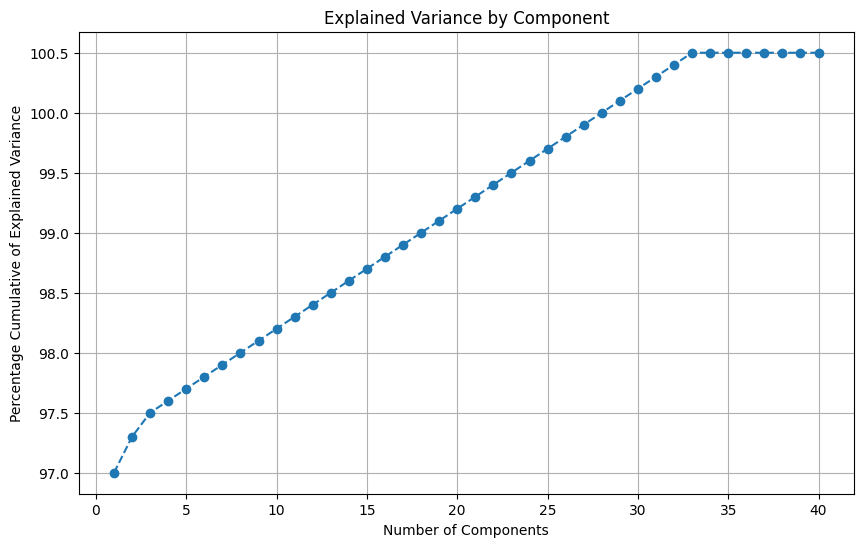

In [73]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_feature)
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
plt.figure(figsize = (10,6))
plt.plot(range(1, len(per_var)+1), per_var.cumsum(), marker = "o", linestyle = "--")
plt.grid()
plt.ylabel("Percentage Cumulative of Explained Variance")
plt.xlabel("Number of Components")
plt.title("Explained Variance by Component")
plt.show()


In [74]:
pca = PCA(n_components = 30)
pca.fit(scaled_feature)

PCA(n_components=30)

In [75]:
scores_pca = pca.transform(scaled_feature)

# Phương pháp elbow tìm số cụm

In [76]:

WCSS = []

for i in range(1,30):
  kmeans_pca = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

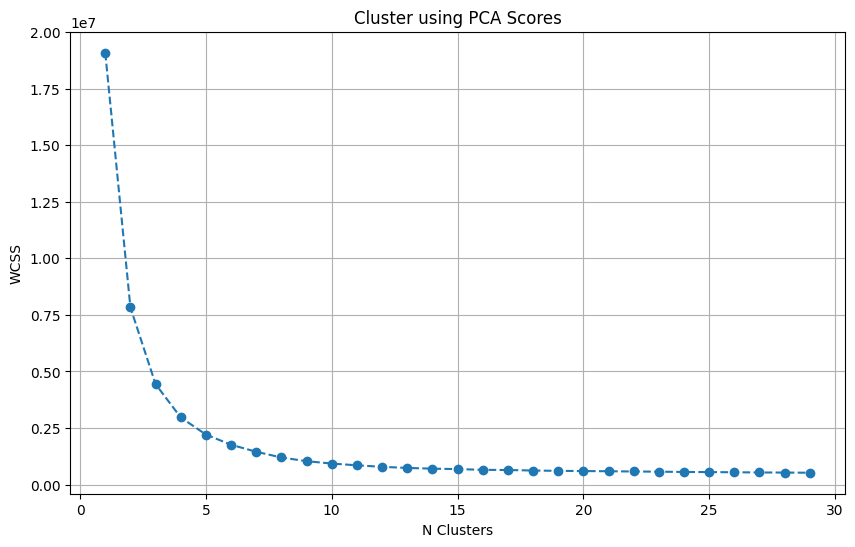

In [77]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30), WCSS, marker = "o", linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.show()

**The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters. Our Elbow point is around cluster size of 5.
We will use k=5 to further interpret our clustering result.**

# Thực hiện phân cụm với K = 5

In [78]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(scores_pca)

KMeans(n_clusters=5)

In [79]:
kmeans.labels_
labels = kmeans.labels_
print(np.shape(labels))

(14824,)


In [36]:
len(kmeans.labels_)

15000

In [80]:
df['cluster'] = kmeans.labels_

In [81]:
df.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,2007,3,18.400134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2007,0,17.410000,49,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2007,0,17.511000,41,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,1,2,0,1,0,0,4,0,0,1,0,0,0,0,0,0,1,1,4
3,2006,0,19.010786,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
4,2008,0,16.657000,1,0,0,0,0,0,1,0,0,3,0,6,0,2,0,0,0,0,0,1,0,1,1,0,0,5,0,0,0,0,3,0,0,0,0,0,0,1


## Trực quan hóa với T-SNE

<Axes: xlabel='C1', ylabel='C2'>

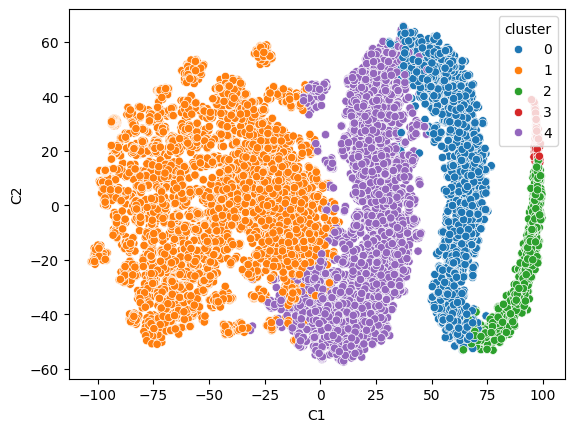

In [82]:
from sklearn.manifold import TSNE
import seaborn as sns
t_sne = TSNE(n_components=2)
t_sne_data = pd.DataFrame(t_sne.fit_transform(scores_pca), columns=["C1","C2"])
t_sne_data['cluster'] = pd.Categorical(labels)
sns.scatterplot(x="C1",y="C2",hue="cluster",data=t_sne_data)

In [230]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,calinski_harabasz_score
print(f"Điểm Silhouette là: {silhouette_score(scores_pca,labels)}")
print(f"Điểm davies_bouldin là: {davies_bouldin_score(scores_pca,labels)}")
print(f"Điểm calinski_harabasz là: {calinski_harabasz_score(scores_pca,labels)}")

Điểm Silhouette là: 0.5004789631736186
Điểm davies_bouldin là: 0.6313691810299561
Điểm calinski_harabasz là: 28180.117950908225


# 📌Interpreting Clustering Results

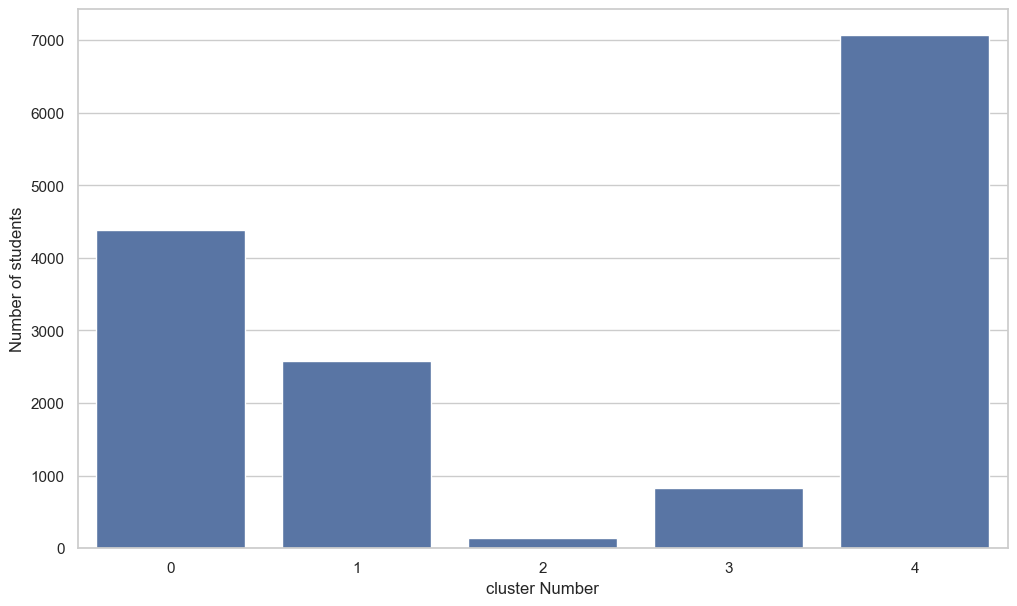

In [39]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1), y=data.groupby(['cluster']).count()['age'].values)
x=axis.set_xlabel("cluster Number")
x=axis.set_ylabel("Number of students")

**From the above plot we can see that cluster 0 is the largest and cluster 2 has fewest teen students.**

# 📌Let' see the number of students belonging to each cluster

In [40]:
size_array = list(data.groupby(['cluster']).count()['age'].values)
size_array

[4378, 2579, 147, 824, 7072]

## 📌Average Age in each cluster

In [41]:
# Calculate the mean age for each cluster
mean_age = data.groupby('cluster')['age'].mean()

# Print the mean age for each cluster in the desired format
for cluster, age in mean_age.items():
    print(f"Cluster {cluster}: {age:.2f} years")


Cluster 0: 18.01 years
Cluster 1: 17.75 years
Cluster 2: 17.68 years
Cluster 3: 17.81 years
Cluster 4: 18.06 years


In [42]:
data['gender'] = data['gender'].map({'F': 0, 'M': 1, 'not disclosed':3})


In [43]:
data.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,2007,3,18.400134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
1,2007,0,17.410000,49,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,2007,0,17.511000,41,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,1,2,0,1,0,0,4,0,0,1,0,0,0,0,0,0,1,1,0
3,2006,0,19.010786,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2008,0,16.657000,1,0,0,0,0,0,1,0,0,3,0,6,0,2,0,0,0,0,0,1,0,1,1,0,0,5,0,0,0,0,3,0,0,0,0,0,0,4


In [44]:
data['gender'].value_counts()


gender
0    11057
1     2606
3     1337
Name: count, dtype: int64

## 📌Percentage of females in each cluster

In [45]:
data['gender'] = data['gender'].map({'F': 0, 'M': 1, 'not disclosed':3})
# Calculate the percentage of females in each cluster
percentage_female = data[data['gender'] == 0].groupby('cluster').size() / data.groupby('cluster').size() * 100

# Print the percentage of females in each cluster in a readable format
for cluster, percentage in percentage_female.items():
    print(f"Cluster {cluster}: {percentage:.2f}% females")


Cluster 0: 75.26% females
Cluster 1: 77.67% females
Cluster 2: 87.07% females
Cluster 3: 79.61% females
Cluster 4: 70.35% females


## 📌Average number of friends in each cluster

In [46]:
# Calculate the average number of friends in each cluster
mean_friends = data.groupby('cluster')['NumberOffriends'].mean()

# Print the average number of friends in each cluster in a readable format
for cluster, avg_friends in mean_friends.items():
    print(f"Cluster {cluster}: Average number of friends = {avg_friends:.2f}")


Cluster 0: Average number of friends = 29.83
Cluster 1: Average number of friends = 61.79
Cluster 2: Average number of friends = 208.65
Cluster 3: Average number of friends = 110.61
Cluster 4: Average number of friends = 5.05


## 📌Cluster Analysis

In [47]:
# Calculate the average number of friends in each cluster
mean_friends = data.groupby('cluster')['NumberOffriends'].mean()

# Print the average number of friends in each cluster in a readable format
for cluster, avg_friends in mean_friends.items():
    print(f"Cluster {cluster}: Average number of friends = {avg_friends:.2f}")
cluster_analysis = pd.DataFrame({
    'Mean Age': mean_age,
    'Percentage Female': percentage_female,
    'Mean Number of Friends': mean_friends,
    'Number of Students': size_array  
})

print("Cluster Analysis:")
for cluster, row in cluster_analysis.iterrows():
    print(f"Cluster {cluster}:")
    print(f"  Mean Age: {row['Mean Age']:.2f} years")
    print(f"  Percentage Female: {row['Percentage Female']:.2f}%")
    print(f"  Mean Number of Friends: {row['Mean Number of Friends']:.2f}")
    print(f"  Number of Students: {row['Number of Students']}")
    print()  


Cluster Analysis:
Cluster 0:
  Mean Age: 18.01 years
  Percentage Female: 75.26%
  Mean Number of Friends: 29.83
  Number of Students: 4378.0

Cluster 1:
  Mean Age: 17.75 years
  Percentage Female: 77.67%
  Mean Number of Friends: 61.79
  Number of Students: 2579.0

Cluster 2:
  Mean Age: 17.68 years
  Percentage Female: 87.07%
  Mean Number of Friends: 208.65
  Number of Students: 147.0

Cluster 3:
  Mean Age: 17.81 years
  Percentage Female: 79.61%
  Mean Number of Friends: 110.61
  Number of Students: 824.0

Cluster 4:
  Mean Age: 18.06 years
  Percentage Female: 70.35%
  Mean Number of Friends: 5.05
  Number of Students: 7072.0



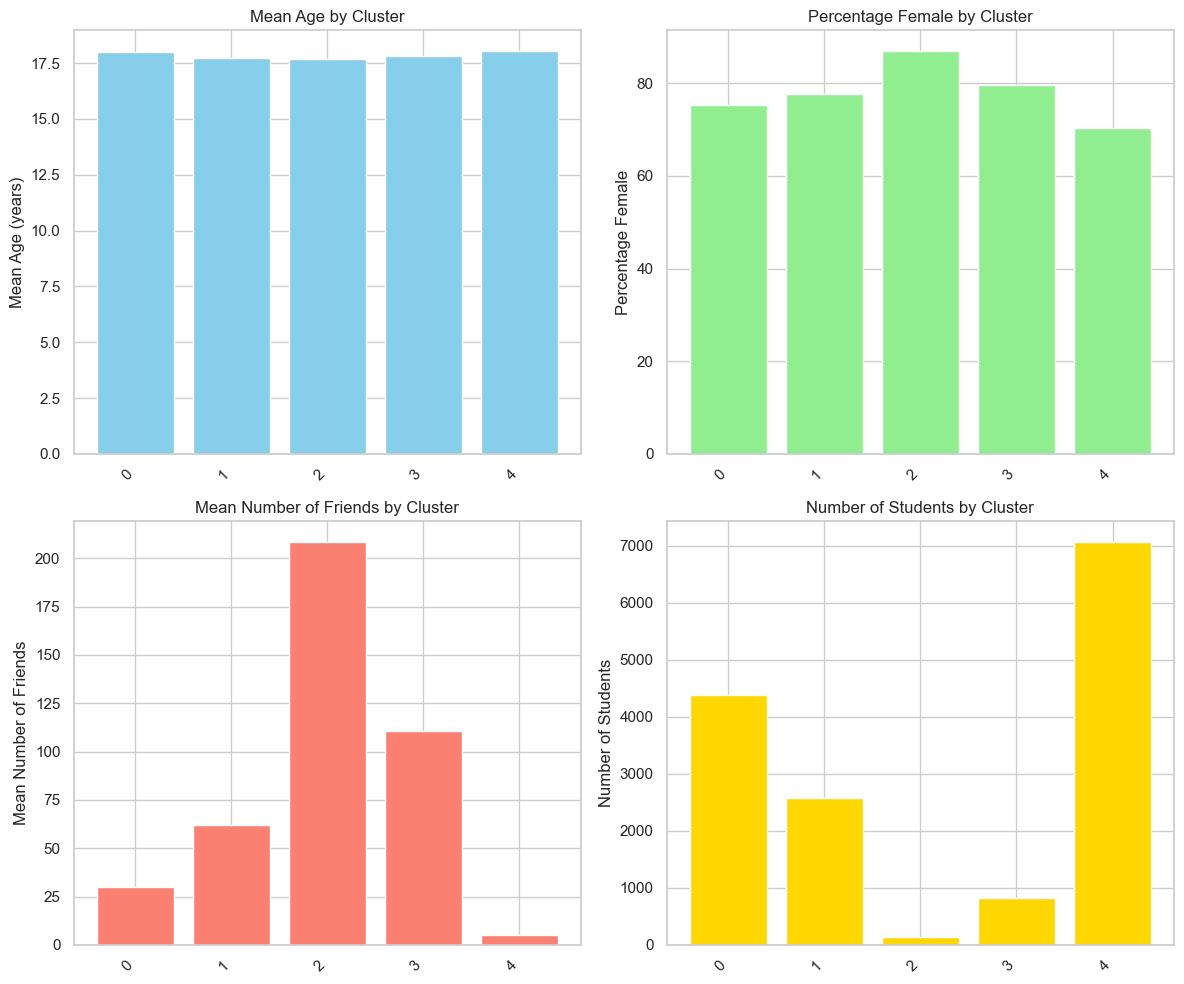

In [48]:

clusters = cluster_analysis.index

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Mean Age
axs[0, 0].bar(clusters, cluster_analysis['Mean Age'], color='skyblue')
axs[0, 0].set_title('Mean Age by Cluster')
axs[0, 0].set_ylabel('Mean Age (years)')

# Percentage Female
axs[0, 1].bar(clusters, cluster_analysis['Percentage Female'], color='lightgreen')
axs[0, 1].set_title('Percentage Female by Cluster')
axs[0, 1].set_ylabel('Percentage Female')

# Mean Number of Friends
axs[1, 0].bar(clusters, cluster_analysis['Mean Number of Friends'], color='salmon')
axs[1, 0].set_title('Mean Number of Friends by Cluster')
axs[1, 0].set_ylabel('Mean Number of Friends')

# Number of Students
axs[1, 1].bar(clusters, cluster_analysis['Number of Students'], color='gold')
axs[1, 1].set_title('Number of Students by Cluster')
axs[1, 1].set_ylabel('Number of Students')

# Rotate x-axis labels for better readability
for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


## 📌Describe clusters characteristics

In [49]:
def describe_clusters(df):
   
    # Describe cluster characteristics
    cluster_analysis = df.groupby('cluster').mean().T
    print("Cluster Characteristics:")
    cluster_df = pd.DataFrame(cluster_analysis)
    
    return cluster_df

describe_clusters(data)

Cluster Characteristics:


cluster,0,1,2,3,4
gradyear,2007.491777,2007.613028,2007.897959,2007.675971,2007.428592
gender,0.388534,0.388523,0.251701,0.395631,0.502121
age,18.014373,17.745278,17.678432,17.813520,18.058586
NumberOffriends,29.831887,61.788290,208.646259,110.614078,5.054440
basketball,0.300365,0.333463,0.312925,0.331311,0.213660
football,0.277296,0.285770,0.299320,0.305825,0.224123
soccer,0.241206,0.260566,0.231293,0.258495,0.191601
softball,0.164459,0.226832,0.149660,0.279126,0.118495
volleyball,0.165829,0.197751,0.258503,0.182039,0.101810
swimming,0.149155,0.170997,0.217687,0.140777,0.110718


 # 📌Recommendation for marketing department
 
#### 👉Targeting Female-Centric Products:

Clusters 1, 2, and 3 have a higher percentage of females compared to the overall population. Therefore, products or advertisements that specifically target teenage girls may perform well within these clusters.
Products related to fashion, beauty, socializing, or lifestyle may resonate more with these clusters.


#### 👉Understanding Male-Centric Interests:

Clusters 0 and 4 have a higher percentage of males. Understanding the interests and preferences of teenage boys within these clusters can help develop marketing campaigns tailored to their needs.
Products related to sports, technology, gaming, or adventure may appeal more to these clusters.

#### 👉Fashion and Retail Promotions:

Clusters 2 and 3 show a higher interest in shopping, suggesting that advertising campaigns or promotions related to shopping might be more effective for these clusters.


#### 👉Sports and Lifestyle Brand Partnerships:

Collaborate with sports brands or organize sports-related events and activities to appeal to clusters showing a strong interest in sports (e.g., Clusters 3 and 4).


### Hierarchical Clustering


#### import some libraries

In [61]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [62]:
data_hier = df.drop(columns = ['cluster'])
data_hier

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,3,18.400134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2007,0,17.410000,49,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2007,0,17.511000,41,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,1,2,0,1,0,0,4,0,0,1,0,0,0,0,0,0,1,1
3,2006,0,19.010786,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2008,0,16.657000,1,0,0,0,0,0,1,0,0,3,0,6,0,2,0,0,0,0,0,1,0,1,1,0,0,5,0,0,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2008,0,16.329000,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,2,0,0,0,1,0,0
14996,2008,0,16.545000,50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
14997,2007,0,17.999000,32,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14998,2007,0,17.903000,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
scaled_feature.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,3,18.400134,0,-0.339355,-0.365296,-0.241099,-0.217422,-0.224563,-0.246262,-0.209631,-0.201088,-0.166382,-0.303293,-0.405275,-0.167460,-0.270446,-0.268779,-0.194639,-0.369052,-0.280677,-0.142393,-0.613998,-0.331043,-0.355403,-0.312748,-0.191116,-0.097716,-0.396063,-0.253075,-0.041578,-0.369056,-0.491207,-0.313859,-0.201391,-0.183584,-0.304644,-0.259508,-0.218099,-0.174865
1,2007,2,17.410000,49,-0.339355,-0.365296,0.843262,-0.217422,-0.224563,1.568148,-0.209631,-0.201088,-0.166382,-0.303293,-0.405275,-0.167460,-0.270446,-0.268779,-0.194639,-0.369052,-0.280677,-0.142393,-0.613998,-0.331043,0.390420,-0.312748,-0.191116,-0.097716,-0.396063,-0.253075,-0.041578,-0.369056,-0.491207,-0.313859,-0.201391,-0.183584,-0.304644,-0.259508,2.152208,-0.174865
2,2007,2,17.511000,41,-0.339355,-0.365296,-0.241099,-0.217422,-0.224563,-0.246262,-0.209631,1.715907,-0.166382,-0.303293,-0.405275,2.168572,-0.270446,-0.268779,-0.194639,-0.369052,-0.280677,-0.142393,0.222344,2.373496,-0.355403,0.970800,-0.191116,-0.097716,3.274038,-0.253075,-0.041578,1.045706,-0.491207,-0.313859,-0.201391,-0.183584,-0.304644,-0.259508,2.152208,2.692614
3,2006,2,19.010786,36,-0.339355,-0.365296,-0.241099,-0.217422,-0.224563,-0.246262,-0.209631,-0.201088,-0.166382,-0.303293,-0.405275,-0.167460,-0.270446,-0.268779,-0.194639,-0.369052,-0.280677,-0.142393,-0.613998,-0.331043,-0.355403,-0.312748,-0.191116,-0.097716,-0.396063,-0.253075,-0.041578,-0.369056,-0.491207,-0.313859,-0.201391,-0.183584,-0.304644,-0.259508,-0.218099,-0.174865
4,2008,2,16.657000,1,-0.339355,-0.365296,-0.241099,-0.217422,-0.224563,1.568148,-0.209631,-0.201088,5.486296,-0.303293,6.966254,-0.167460,3.625657,-0.268779,-0.194639,-0.369052,-0.280677,-0.142393,0.222344,-0.331043,0.390420,0.970800,-0.191116,-0.097716,4.191564,-0.253075,-0.041578,-0.369056,-0.491207,5.936888,-0.201391,-0.183584,-0.304644,-0.259508,-0.218099,-0.174865


In [64]:
X_hier = scaled_feature.to_numpy()
X_hier

array([[ 2.00700000e+03,  3.00000000e+00,  1.84001342e+01, ...,
        -2.59508057e-01, -2.18098955e-01, -1.74865151e-01],
       [ 2.00700000e+03,  2.00000000e+00,  1.74100000e+01, ...,
        -2.59508057e-01,  2.15220816e+00, -1.74865151e-01],
       [ 2.00700000e+03,  2.00000000e+00,  1.75110000e+01, ...,
        -2.59508057e-01,  2.15220816e+00,  2.69261384e+00],
       ...,
       [ 2.00700000e+03,  2.00000000e+00,  1.79990000e+01, ...,
        -2.59508057e-01, -2.18098955e-01, -1.74865151e-01],
       [ 2.00700000e+03,  2.00000000e+00,  1.79030000e+01, ...,
        -2.59508057e-01, -2.18098955e-01, -1.74865151e-01],
       [ 2.00900000e+03,  2.00000000e+00,  1.58110000e+01, ...,
        -2.59508057e-01, -2.18098955e-01,  2.69261384e+00]])

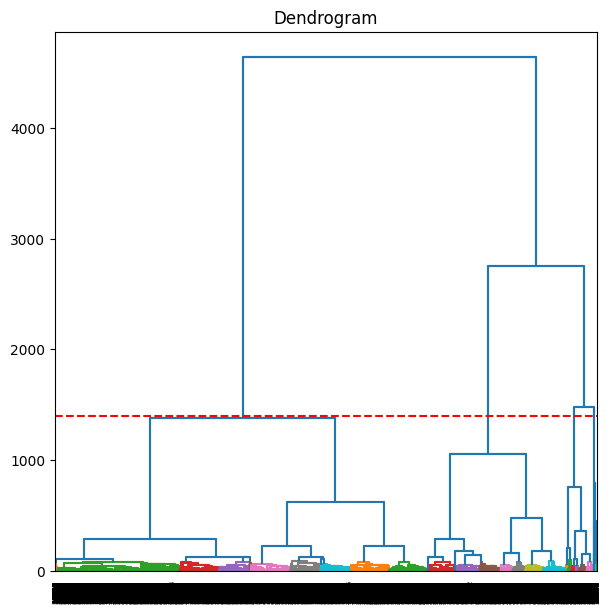

<Figure size 640x480 with 0 Axes>

In [65]:
linkage_matrix = shc.linkage(X_hier, 'ward')
plt.figure(figsize=(7, 7))
shc.dendrogram(linkage_matrix)
dendrogram = shc.dendrogram(linkage_matrix, color_threshold=100) 
plt.axhline(y=1400, color='r', linestyle='--')
plt.title("Dendrogram")
plt.show()
plt.savefig('dendro.png')

In [66]:
model = AgglomerativeClustering(n_clusters=4, linkage='ward')

In [67]:
model.fit(X_hier)
labels_hier = model.labels_
labels_hier

array([0, 2, 2, ..., 0, 0, 0], dtype=int64)

In [68]:
data_hier['cluster'] = labels_hier
data_hier.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,2007,3,18.400134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2007,0,17.410000,49,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2
2,2007,0,17.511000,41,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,1,2,0,1,0,0,4,0,0,1,0,0,0,0,0,0,1,1,2
3,2006,0,19.010786,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,2008,0,16.657000,1,0,0,0,0,0,1,0,0,3,0,6,0,2,0,0,0,0,0,1,0,1,1,0,0,5,0,0,0,0,3,0,0,0,0,0,0,0


## Trực quan hóa với T-SNE

<Axes: xlabel='C1', ylabel='C2'>

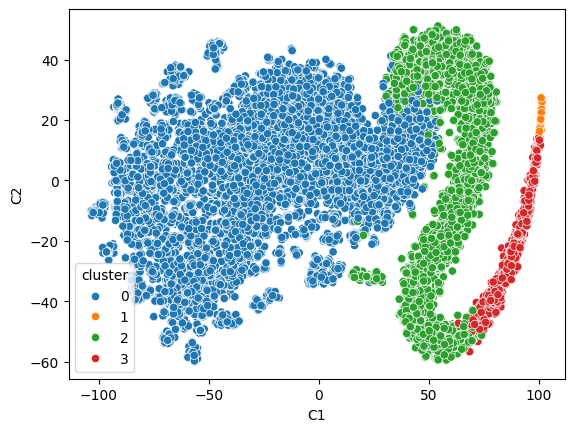

In [70]:
from sklearn.manifold import TSNE
import seaborn as sns
t_sne = TSNE(n_components=2)
t_sne_data = pd.DataFrame(t_sne.fit_transform(X_hier), columns=["C1","C2"])
t_sne_data['cluster'] = pd.Categorical(labels_hier)
sns.scatterplot(x="C1",y="C2",hue="cluster",data=t_sne_data)

In [83]:
print(f"Điểm Silhouette là: {silhouette_score(X_hier,labels_hier)}")
print(f"Điểm davies_bouldin là: {davies_bouldin_score(X_hier,labels_hier)}")
print(f"Điểm calinski_harabasz là: {calinski_harabasz_score(X_hier,labels_hier)}")

Điểm Silhouette là: 0.4284459340637437
Điểm davies_bouldin là: 0.679620468873833
Điểm calinski_harabasz là: 17275.90419762746


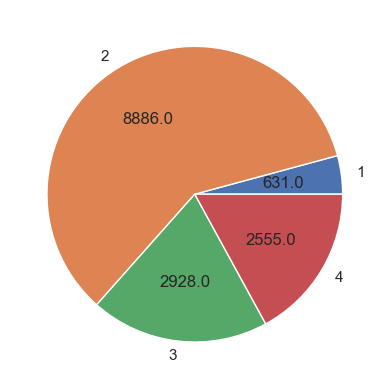

In [58]:
# size_array = list(data_hier.groupby(['cluster']).count()['age'].values)
# size_array = np.array(size_array)
# def absolute_value(val):
#     a  = np.round(val/100.*size_array.sum(), 0)
#     return a
# plt.pie(size_array, labels=[1,2,3,4], autopct=absolute_value)
# plt.show()

In [59]:
# size_array

array([ 631, 8886, 2928, 2555], dtype=int64)

In [60]:
# data_hier['cluster'].unique()

array([1, 2, 3, 0], dtype=int64)

In [61]:
# # Calculate the percentage of females in each cluster
# percentage_female = data_hier[data_hier['gender'] == 0].groupby('cluster').size() / data_hier.groupby('cluster').size() * 100

# # Print the percentage of females in each cluster in a readable format
# for cluster, percentage in percentage_female.items():
#     print(f"Cluster {cluster}: {percentage:.2f}% females")

Cluster 0: 81.93% females
Cluster 1: 70.95% females
Cluster 2: 76.54% females
Cluster 3: 78.04% females


In [62]:
# # Calculate the average number of friends in each cluster
# mean_friends = data_hier.groupby('cluster')['NumberOffriends'].mean()

# # Print the average number of friends in each cluster in a readable format
# for cluster, avg_friends in mean_friends.items():
#     print(f"Cluster {cluster}: Average number of friends = {avg_friends:.2f}")

Cluster 0: Average number of friends = 142.61
Cluster 1: Average number of friends = 8.76
Cluster 2: Average number of friends = 36.48
Cluster 3: Average number of friends = 67.65


In [63]:
# # Calculate the mean age for each cluster
# mean_age = data_hier.groupby('cluster')['age'].mean()

# # Print the mean age for each cluster in the desired format
# for cluster, age in mean_age.items():
#     print(f"Cluster {cluster}: {age:.2f} years")


Cluster 0: 17.64 years
Cluster 1: 17.51 years
Cluster 2: 20.04 years
Cluster 3: 17.30 years


In [64]:
# cluster_analysis = pd.DataFrame({
#     'Mean Age': mean_age,
#     'Percentage Female': percentage_female,
#     'Mean Number of Friends': mean_friends,
#     'Number of Students': size_array  
# })

# print("Cluster Analysis:")
# for cluster, row in cluster_analysis.iterrows():
#     print(f"Cluster {cluster}:")
#     print(f"  Mean Age: {row['Mean Age']:.2f} years")
#     print(f"  Percentage Female: {row['Percentage Female']:.2f}%")
#     print(f"  Mean Number of Friends: {row['Mean Number of Friends']:.2f}")
#     print(f"  Number of Students: {row['Number of Students']}")
#     print()  


Cluster Analysis:
Cluster 0:
  Mean Age: 17.64 years
  Percentage Female: 81.93%
  Mean Number of Friends: 142.61
  Number of Students: 631.0

Cluster 1:
  Mean Age: 17.51 years
  Percentage Female: 70.95%
  Mean Number of Friends: 8.76
  Number of Students: 8886.0

Cluster 2:
  Mean Age: 20.04 years
  Percentage Female: 76.54%
  Mean Number of Friends: 36.48
  Number of Students: 2928.0

Cluster 3:
  Mean Age: 17.30 years
  Percentage Female: 78.04%
  Mean Number of Friends: 67.65
  Number of Students: 2555.0



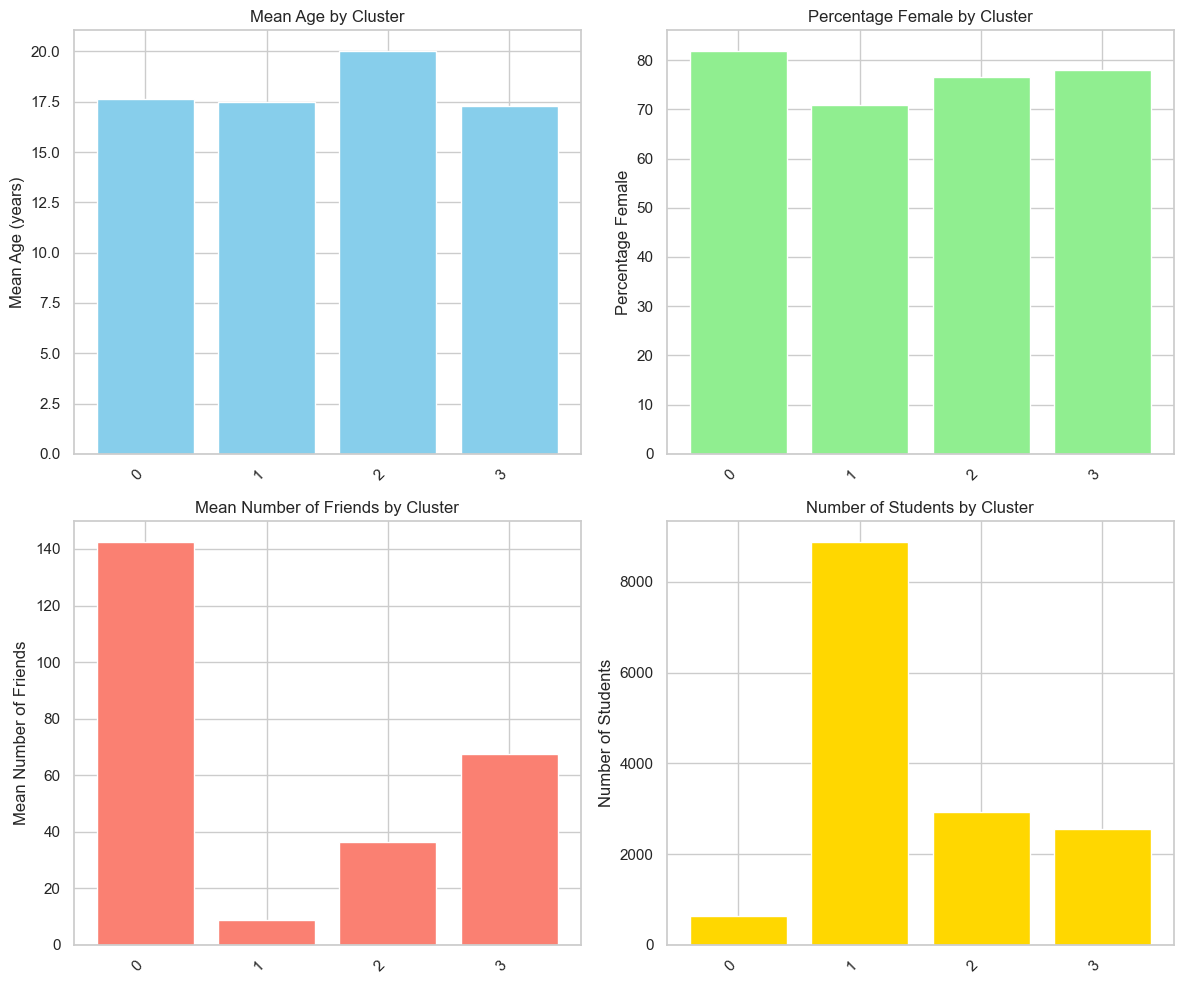

In [65]:
# clusters = cluster_analysis.index

# fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# # Mean Age
# axs[0, 0].bar(range(len(clusters)), cluster_analysis['Mean Age'], color='skyblue')
# axs[0, 0].set_title('Mean Age by Cluster')
# axs[0, 0].set_ylabel('Mean Age (years)')
# axs[0, 0].set_xticks(range(len(clusters)))
# axs[0, 0].set_xticklabels(clusters, rotation=45, ha='right')

# # Percentage Female
# axs[0, 1].bar(range(len(clusters)), cluster_analysis['Percentage Female'], color='lightgreen')
# axs[0, 1].set_title('Percentage Female by Cluster')
# axs[0, 1].set_ylabel('Percentage Female')
# axs[0, 1].set_xticks(range(len(clusters)))
# axs[0, 1].set_xticklabels(clusters, rotation=45, ha='right')

# # Mean Number of Friends
# axs[1, 0].bar(range(len(clusters)), cluster_analysis['Mean Number of Friends'], color='salmon')
# axs[1, 0].set_title('Mean Number of Friends by Cluster')
# axs[1, 0].set_ylabel('Mean Number of Friends')
# axs[1, 0].set_xticks(range(len(clusters)))
# axs[1, 0].set_xticklabels(clusters, rotation=45, ha='right')

# # Number of Students
# axs[1, 1].bar(range(len(clusters)), cluster_analysis['Number of Students'], color='gold')
# axs[1, 1].set_title('Number of Students by Cluster')
# axs[1, 1].set_ylabel('Number of Students')
# axs[1, 1].set_xticks(range(len(clusters)))
# axs[1, 1].set_xticklabels(clusters, rotation=45, ha='right')

# plt.tight_layout()
# plt.show()


In [66]:
# describe_clusters(data_hier)

Cluster Characteristics:


cluster,0,1,2,3
gradyear,2007.713154,2007.434616,2007.526981,2007.625832
gender,0.351823,0.482894,0.376708,0.391781
age,17.641678,17.511647,20.043478,17.296163
NumberOffriends,142.614897,8.764573,36.478484,67.646575
basketball,0.362916,0.235314,0.284495,0.333464
football,0.302694,0.231825,0.289959,0.286497
soccer,0.220285,0.201778,0.232923,0.280235
softball,0.250396,0.115800,0.193306,0.251272
volleyball,0.198098,0.113437,0.154030,0.219178
swimming,0.153724,0.122102,0.148224,0.160078


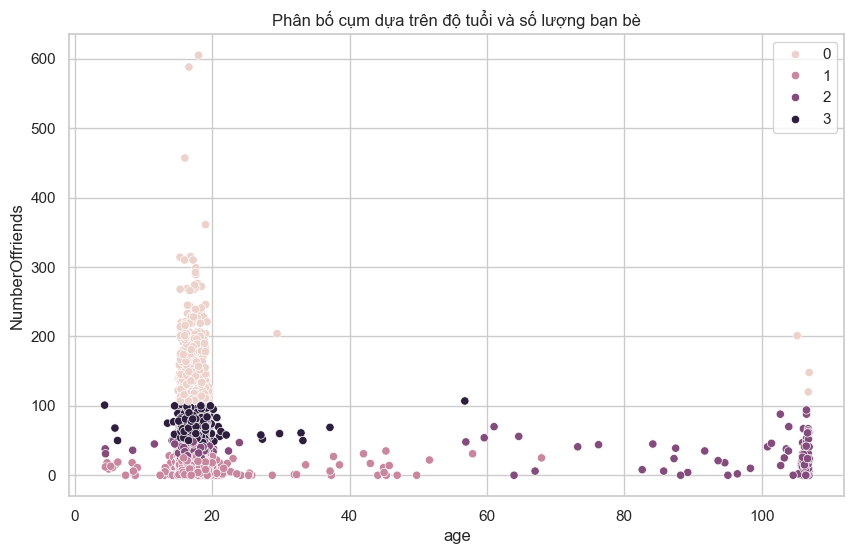

In [82]:
# import seaborn as sns 
# plt.figure(figsize=(10, 6))
# pl = sns.scatterplot(data = data_hier,x=data_hier["age"], y=data_hier["NumberOffriends"],hue=data_hier["cluster"])
# pl.set_title("Phân bố cụm dựa trên độ tuổi và số lượng bạn bè")
# plt.legend()
# plt.show()

### DATA EXPLORATION

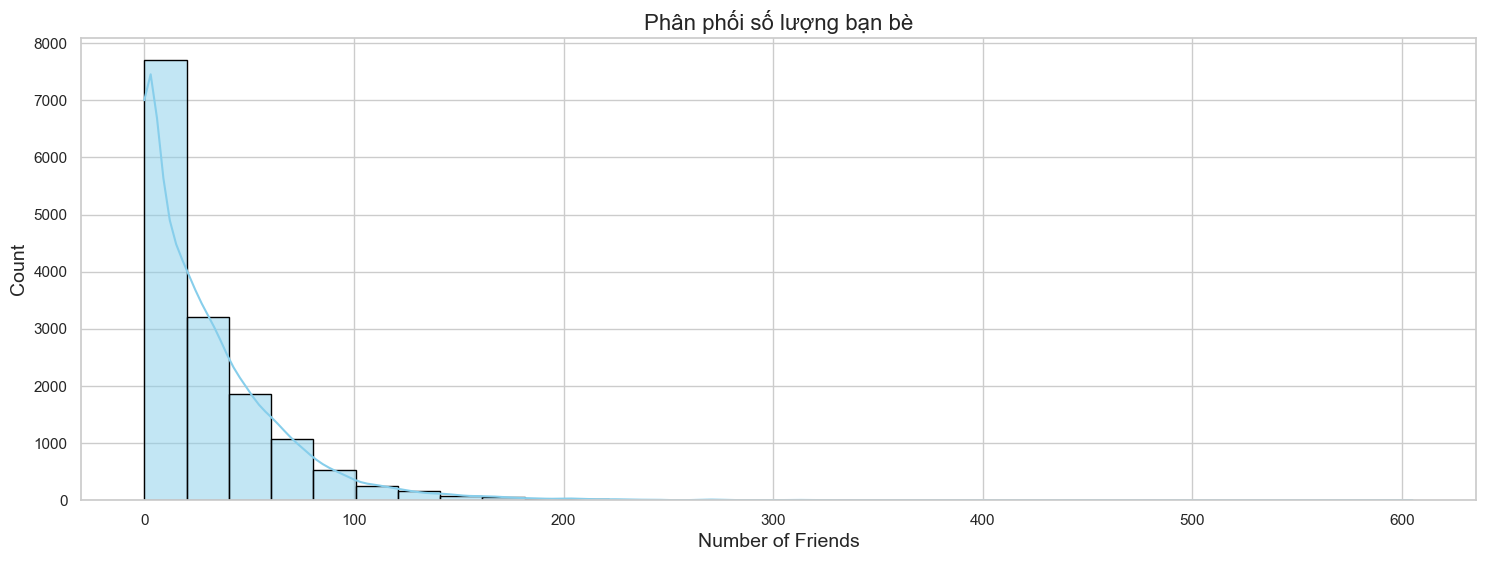

In [70]:

# Visualize the distribution of the number of friends
# plt.figure(figsize=(18, 6))
# sns.histplot(data=data_hier, x='NumberOffriends', bins=30, kde=True, color='skyblue', edgecolor='black')
# plt.title('Phân phối số lượng bạn bè', fontsize=16)
# plt.xlabel('Number of Friends', fontsize=14)
# plt.ylabel('Count', fontsize=14)
# plt.show()

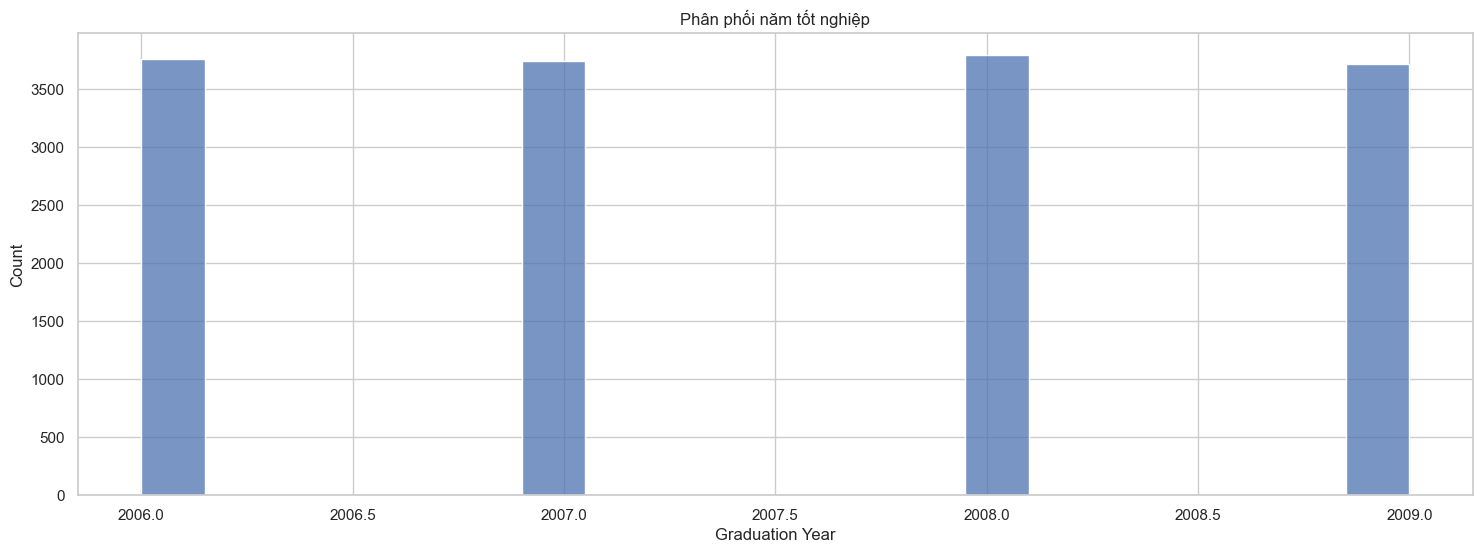

In [71]:
# plt.figure(figsize=(18, 6))
# sns.histplot(data=data_hier, x='gradyear', bins=20)
# plt.title('Phân phối năm tốt nghiệp')
# plt.xlabel('Graduation Year')
# plt.ylabel('Count')
# plt.show()

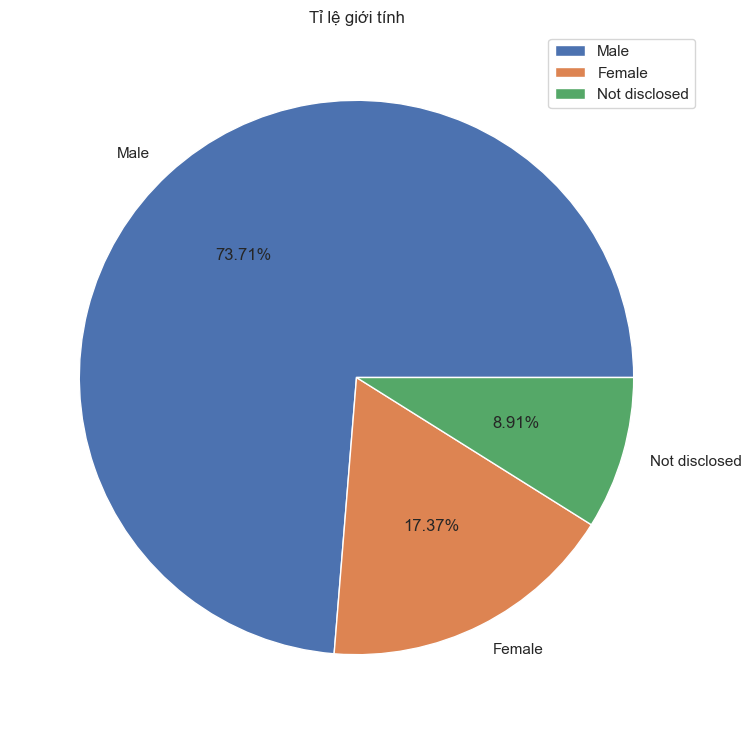

In [72]:
# labels = ['Male','Female','Not disclosed']
# size = data_hier['gender'].value_counts()
# explode = [0,0.1]
# plt.rcParams['figure.figsize'] = (9,9)
# plt.pie(size, labels=labels, autopct='%.2f%%')
# plt.title("Tỉ lệ giới tính") 
# plt.legend()
# plt.show()

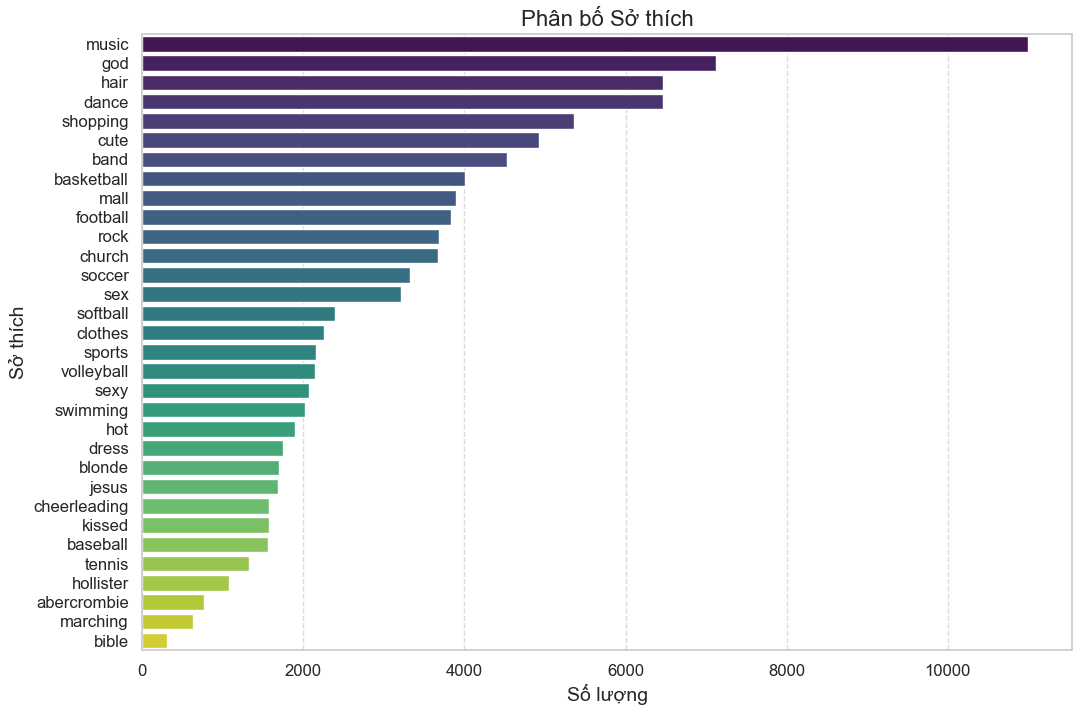

In [73]:
# interests = data_hier.iloc[:, 4:-6].sum().sort_values(ascending=False)
# plt.figure(figsize=(12, 8))
# sns.barplot(x=interests.values, y=interests.index, palette='viridis')
# plt.title('Phân bố Sở thích', fontsize=16)
# plt.xlabel('Số lượng', fontsize=14)
# plt.ylabel('Sở thích', fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.grid(axis='x', linestyle='--', alpha=0.7)
# plt.show()

<Axes: xlabel='age', ylabel='NumberOffriends'>

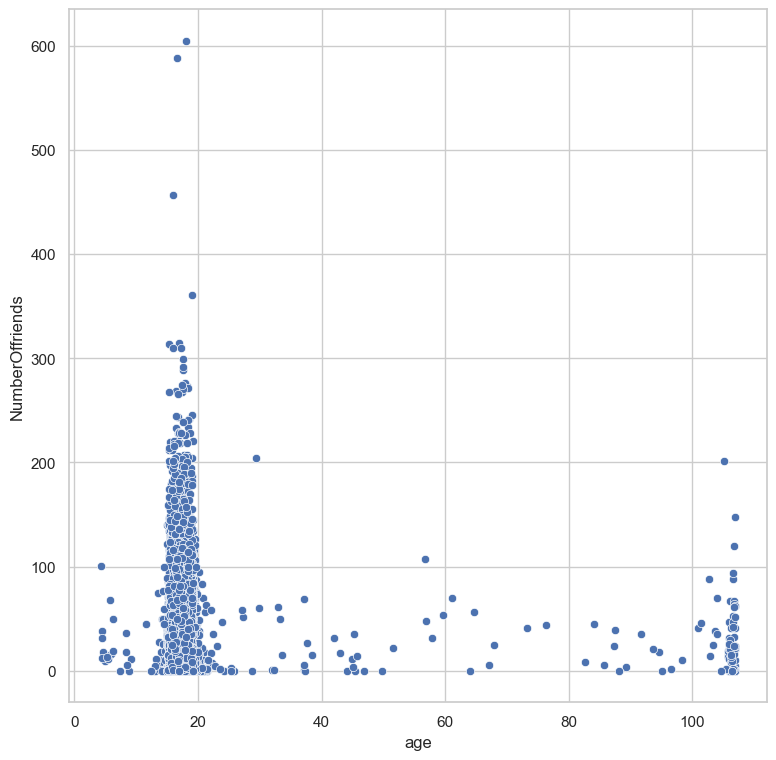

In [79]:
# sns.scatterplot(data=data_hier, x="age",y="NumberOffriends")

### FUZZY C-Means CLUSTERING

In [19]:
from skfuzzy.cluster import cmeans
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score


In [36]:
X = scaled_feature.to_numpy()

In [64]:
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
print(silhouette_score(X, clusters))
print(davies_bouldin_score(X, clusters))
print(calinski_harabasz_score(X, clusters))

0.370595633269248
0.8716996874492366
13575.514028381313


In [61]:
for i in range (3,10):
    for j in range (2,10):
        n_clusters = i  
        fuzzy_cmeans = cmeans(X.T, n_clusters, m=j, error=0.005, maxiter=1000)
        membership_matrix = fuzzy_cmeans[1]
        clusters = np.argmax(membership_matrix, axis=0)
        print(f"Số cụm {i}, Tham số fuzzy: {j}, Chỉ số silhouette: {silhouette_score(X, clusters)}")


Số cụm 3, Tham số fuzzy: 2, Chỉ số silhouette: 0.545306386308023
Số cụm 3, Tham số fuzzy: 3, Chỉ số silhouette: 0.5159394501666023
Số cụm 3, Tham số fuzzy: 4, Chỉ số silhouette: 0.4999250277645317
Số cụm 3, Tham số fuzzy: 5, Chỉ số silhouette: 0.49109114151015826
Số cụm 3, Tham số fuzzy: 6, Chỉ số silhouette: 0.48662657727938885
Số cụm 3, Tham số fuzzy: 7, Chỉ số silhouette: 0.4792085615173464
Số cụm 3, Tham số fuzzy: 8, Chỉ số silhouette: 0.4774053107765287
Số cụm 3, Tham số fuzzy: 9, Chỉ số silhouette: 0.47718284923282617
Số cụm 4, Tham số fuzzy: 2, Chỉ số silhouette: 0.49584111165724326
Số cụm 4, Tham số fuzzy: 3, Chỉ số silhouette: 0.4734364458434771
Số cụm 4, Tham số fuzzy: 4, Chỉ số silhouette: 0.45244938592384654
Số cụm 4, Tham số fuzzy: 5, Chỉ số silhouette: 0.4344404753404968
Số cụm 4, Tham số fuzzy: 6, Chỉ số silhouette: 0.4285069697823951
Số cụm 4, Tham số fuzzy: 7, Chỉ số silhouette: 0.4226390283046333
Số cụm 4, Tham số fuzzy: 8, Chỉ số silhouette: 0.4162758659541524
Số cụm

KeyboardInterrupt: 

In [37]:
for i in range (3,10):
    for j in range (2,10):
        n_clusters = i  
        fuzzy_cmeans = cmesans(X.T, n_clusters, m=j, error=0.005, maxiter=1000)
        membership_matrix = fuzzy_cmeans[1]
        clusters = np.argmax(membership_matrix, axis=0)
        print(f"Số cụm {i}, Tham số fuzzy: {j}, Chỉ số silhouette: {silhouette_score(X, clusters)}, Chỉ số Davies-Bouldin: {davies_bouldin_score(X, clusters)}, Chỉ số Calinski_Harabasz: {calinski_harabasz_score(X, clusters)}")

Số cụm 3, Tham số fuzzy: 2, Chỉ số silhouette: 0.5597218382839562, Chỉ số Davies-Bouldin: 0.6247891623397364, Chỉ số Calinski_Harabasz: 23613.920143482384
Số cụm 3, Tham số fuzzy: 3, Chỉ số silhouette: 0.5318260750698036, Chỉ số Davies-Bouldin: 0.6580644621226335, Chỉ số Calinski_Harabasz: 21607.004034280246
Số cụm 3, Tham số fuzzy: 4, Chỉ số silhouette: 0.5117675098698056, Chỉ số Davies-Bouldin: 0.6715591318520927, Chỉ số Calinski_Harabasz: 19974.414708992386
Số cụm 3, Tham số fuzzy: 5, Chỉ số silhouette: 0.5031954648918879, Chỉ số Davies-Bouldin: 0.6770142961996285, Chỉ số Calinski_Harabasz: 19221.94622813495
Số cụm 3, Tham số fuzzy: 6, Chỉ số silhouette: 0.4988419914780535, Chỉ số Davies-Bouldin: 0.6816639822698947, Chỉ số Calinski_Harabasz: 18751.871875116747
Số cụm 3, Tham số fuzzy: 7, Chỉ số silhouette: 0.4942134699969344, Chỉ số Davies-Bouldin: 0.6828970323528386, Chỉ số Calinski_Harabasz: 18420.942666793337
Số cụm 3, Tham số fuzzy: 8, Chỉ số silhouette: 0.4915125743151256, Chỉ 

KeyboardInterrupt: 

In [38]:
n_clusters = 3
fuzzy_cmeans = cmeans(X.T, n_clusters, m=2, error=0.005, maxiter=1000)
membership_matrix = fuzzy_cmeans[1]
clusters = np.argmax(membership_matrix, axis=0)

In [41]:
np.shape(clusters)

(14824,)

In [42]:
df['cluster'] = clusters

## Trực quan hóa với T-SNE

<Axes: xlabel='C1', ylabel='C2'>

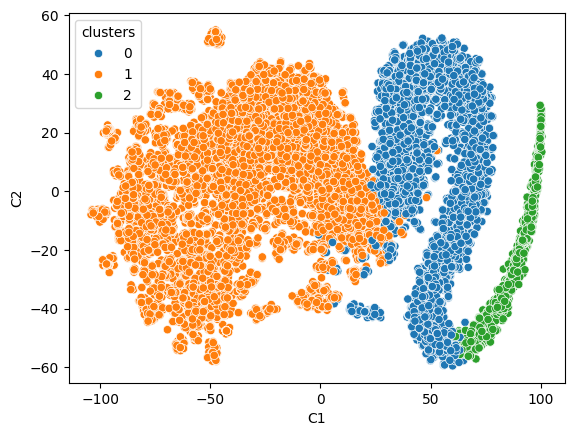

In [46]:
from sklearn.manifold import TSNE
import seaborn as sns
t_sne = TSNE(n_components=2)
t_sne_data = pd.DataFrame(t_sne.fit_transform(X), columns=["C1","C2"])
n_clusters = 3  
fuzzy_cmeans = cmeans(X.T, n_clusters, m=2, error=0.005, maxiter=1000)
membership_matrix = fuzzy_cmeans[1]
clusters = np.argmax(membership_matrix, axis=0)
t_sne_data['clusters'] = pd.Categorical(clusters)
sns.scatterplot(x="C1",y="C2",hue="clusters",data=t_sne_data)

## Phân tích cụm

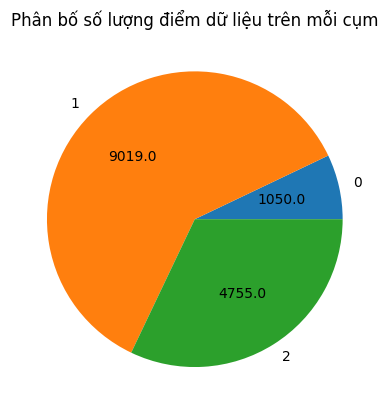

In [53]:
size_array = list(df.groupby(['cluster']).count()['age'].values)
size_array = np.array(size_array)
def absolute_value(val):
    a  = np.round(val/100.*size_array.sum(), 0)
    return a
plt.pie(size_array, labels=[0,1,2], autopct=absolute_value)
plt.title("Phân bố số lượng điểm dữ liệu trên mỗi cụm")
plt.show()

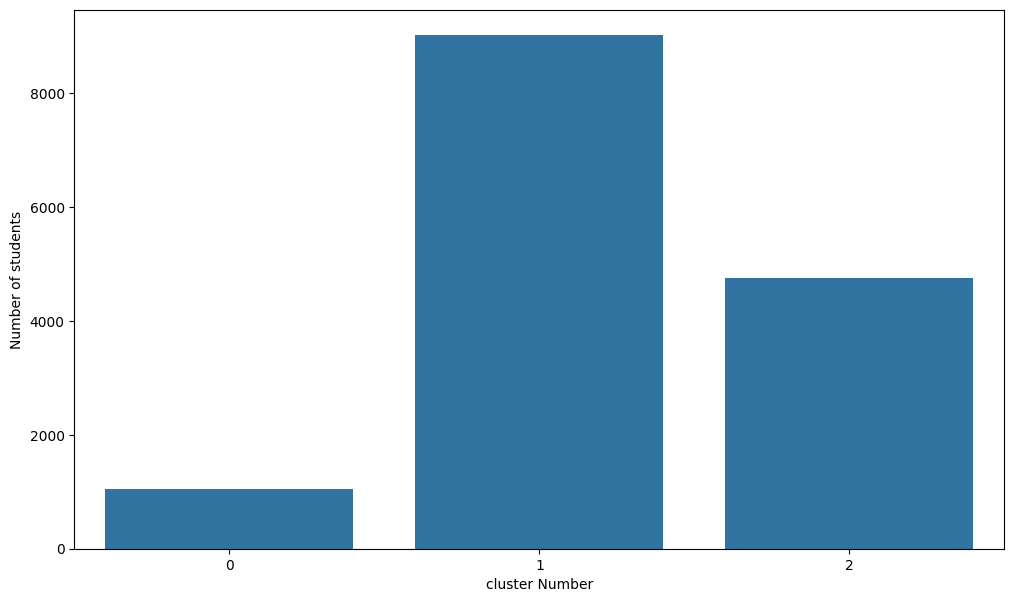

In [50]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,3,1), y=df.groupby(['cluster']).count()['age'].values).set_title("Số lượng bạn bè trên mỗi cụm")
x=axis.set_xlabel("cluster Number")
x=axis.set_ylabel("Number of students")

In [51]:
# Calculate the mean age for each cluster
mean_age = df.groupby('cluster')['age'].mean()

# Print the mean age for each cluster in the desired format
for cluster, age in mean_age.items():
    print(f"Cluster {cluster}: {age:.2f} years")


Cluster 0: 17.22 years
Cluster 1: 17.46 years
Cluster 2: 17.30 years


In [52]:
df['gender'] = df['gender'].map({'F': 0, 'M': 1, 'not disclosed':3})
percentage_female = df[df['gender'] == 0].groupby('cluster').size() / df.groupby('cluster').size() * 100
for cluster, percentage in percentage_female.items():
    print(f"Cluster {cluster}: {percentage:.2f}% females")


Cluster 0: 80.67% females
Cluster 1: 70.89% females
Cluster 2: 77.50% females


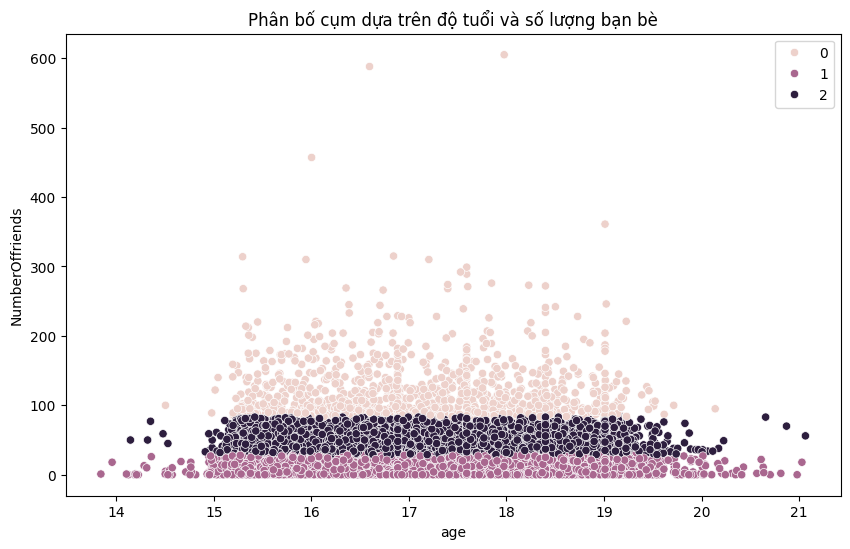

In [54]:
plt.figure(figsize=(10, 6))
pl = sns.scatterplot(data = df,x=df["age"], y=df["NumberOffriends"],hue=df["cluster"])
pl.set_title("Phân bố cụm dựa trên độ tuổi và số lượng bạn bè")
plt.legend()
plt.show()

In [55]:
# Trung bình số lượng bạn bè
mean_friends = df.groupby('cluster')['NumberOffriends'].mean()

# Print the average number of friends in each cluster in a readable format
for cluster, avg_friends in mean_friends.items():
    print(f"Cluster {cluster}: Average number of friends = {avg_friends:.2f}")


Cluster 0: Average number of friends = 122.04
Cluster 1: Average number of friends = 9.03
Cluster 2: Average number of friends = 49.06


In [57]:
cluster_analysis = pd.DataFrame({
    'Mean Age': mean_age,
    'Percentage Female': percentage_female,
    'Mean Number of Friends': mean_friends,
    'Number of Students': size_array  
})

print("Phân tích cụm:")
for cluster, row in cluster_analysis.iterrows():
    print(f"Cluster {cluster}:")
    print(f"  Mean Age: {row['Mean Age']:.2f} years")
    print(f"  Percentage Female: {row['Percentage Female']:.2f}%")
    print(f"  Mean Number of Friends: {row['Mean Number of Friends']:.2f}")
    print(f"  Number of Students: {row['Number of Students']}")
    print() 

Phân tích cụm:
Cluster 0:
  Mean Age: 17.22 years
  Percentage Female: 80.67%
  Mean Number of Friends: 122.04
  Number of Students: 1050.0

Cluster 1:
  Mean Age: 17.46 years
  Percentage Female: 70.89%
  Mean Number of Friends: 9.03
  Number of Students: 9019.0

Cluster 2:
  Mean Age: 17.30 years
  Percentage Female: 77.50%
  Mean Number of Friends: 49.06
  Number of Students: 4755.0



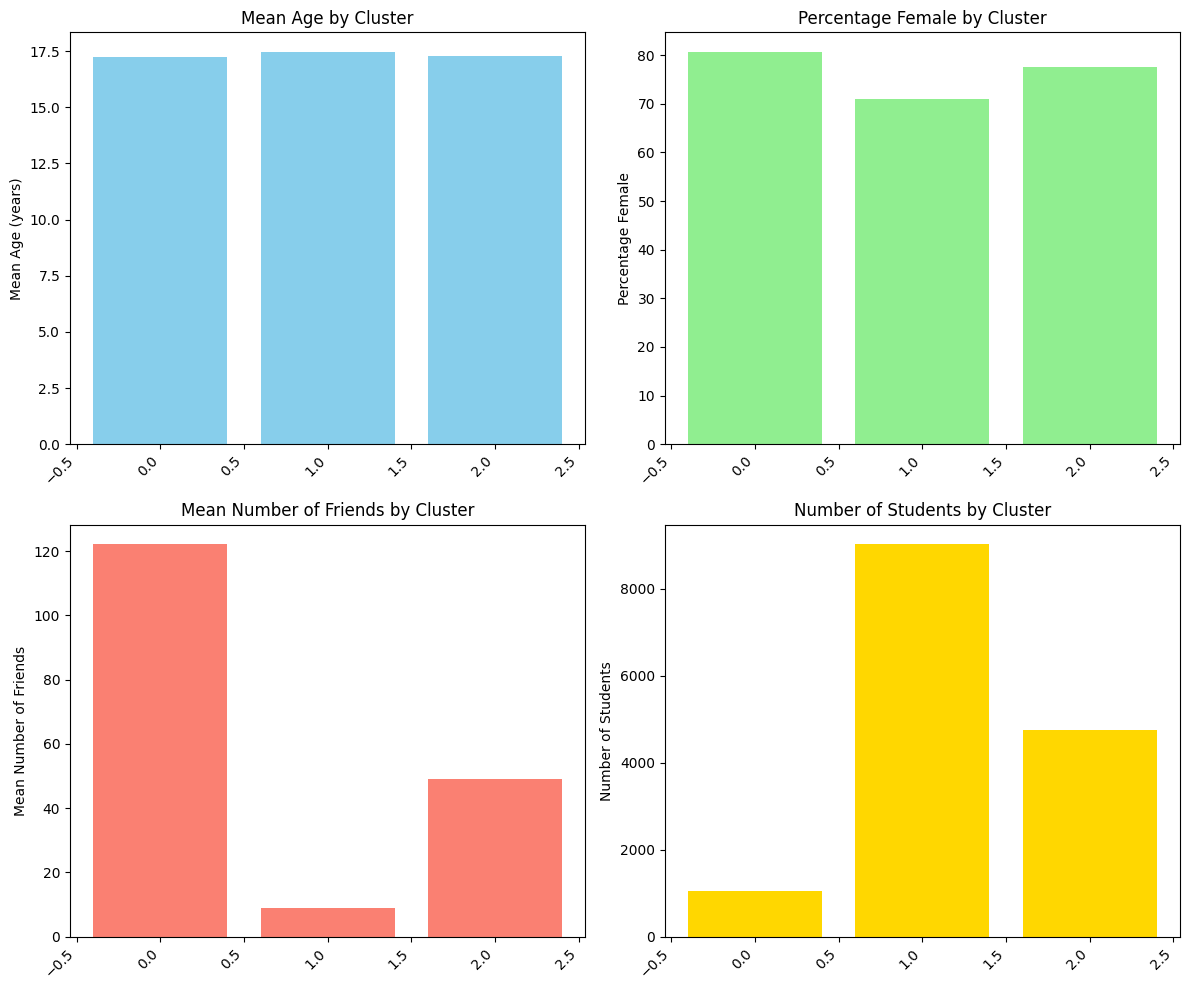

In [58]:
clusters = cluster_analysis.index

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Mean Age
axs[0, 0].bar(clusters, cluster_analysis['Mean Age'], color='skyblue')
axs[0, 0].set_title('Mean Age by Cluster')
axs[0, 0].set_ylabel('Mean Age (years)')

# Percentage Female
axs[0, 1].bar(clusters, cluster_analysis['Percentage Female'], color='lightgreen')
axs[0, 1].set_title('Percentage Female by Cluster')
axs[0, 1].set_ylabel('Percentage Female')

# Mean Number of Friends
axs[1, 0].bar(clusters, cluster_analysis['Mean Number of Friends'], color='salmon')
axs[1, 0].set_title('Mean Number of Friends by Cluster')
axs[1, 0].set_ylabel('Mean Number of Friends')

# Number of Students
axs[1, 1].bar(clusters, cluster_analysis['Number of Students'], color='gold')
axs[1, 1].set_title('Number of Students by Cluster')
axs[1, 1].set_ylabel('Number of Students')

# Rotate x-axis labels for better readability
for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [60]:
def describe_clusters(df):
    cluster_analysis = df.groupby('cluster').mean().T
    print("Cluster Characteristics:")
    cluster_df = pd.DataFrame(cluster_analysis)
    
    return cluster_df

describe_clusters(df)

Cluster Characteristics:


cluster,0,1,2
gradyear,2007.692381,2007.430425,2007.573291
gender,0.376190,0.484644,0.373922
age,17.224255,17.463026,17.297369
NumberOffriends,122.041905,9.031046,49.056782
basketball,0.326667,0.234838,0.317981
football,0.313333,0.236279,0.282440
soccer,0.255238,0.204236,0.249422
softball,0.264762,0.124404,0.207361
volleyball,0.197143,0.110655,0.195163
swimming,0.150476,0.119747,0.162776


### Trực quan hóa với PCA

<Axes: xlabel='PC1', ylabel='PC2'>

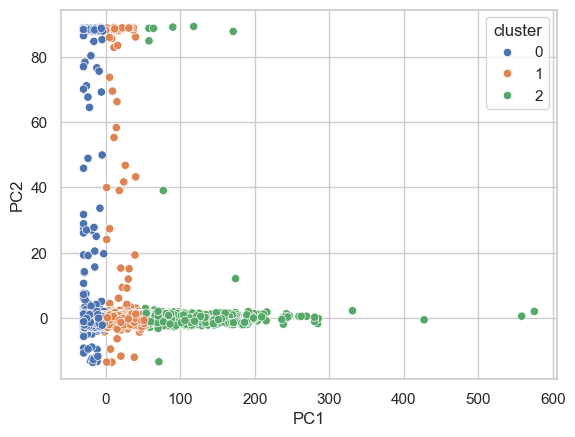

In [85]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca_data = pd.DataFrame(pca.fit_transform(X), columns=["PC1","PC2"])
n_clusters = 3  
fuzzy_cmeans = cmeans(X.T, n_clusters, m=2, error=0.005, maxiter=1000)
membership_matrix = fuzzy_cmeans[1]
clusters = np.argmax(membership_matrix, axis=0)
pca_data['cluster'] = pd.Categorical(clusters)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)
